# Introduction

Probability theory is a branch of mathematics that deals with the study of random phenomena through the idealization of random experiments. The random experiments produces random events, which are events whose occurence is neither necessary nor impossible. Such random events in practice exhibit a certain degree of regularity, which can be exploited to develop models that predict their behavior. The most simple and classical example of that is the coin toss. The following code shows the plot of the number of heads when flipping a fair coin.




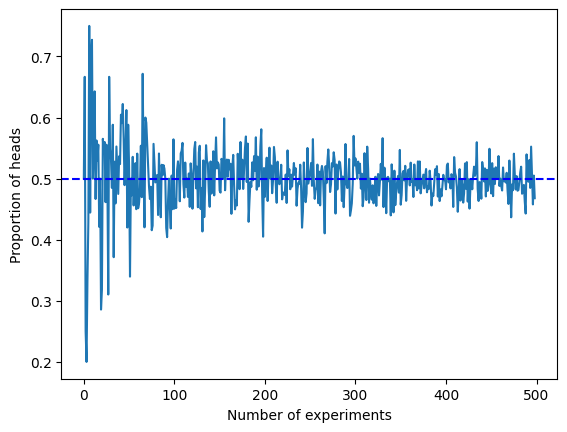

In [3]:
"""
Line plot of the number of heads when flipping a fair coin.
"""
import random
from matplotlib import pyplot as plt
max_number_of_experiments = 500
def coin_toss(n):
    return sum([random.choice((1, 0)) for _ in range(n)])

coin_tosses = [coin_toss(n)/n for n in range(2, max_number_of_experiments+1)]
plt.plot(coin_tosses)
plt.axhline(0.5, color='b', linestyle='--')
plt.xlabel('Number of experiments')
plt.ylabel('Proportion of heads')
plt.show()




The above plot shows how the proportion of heads becomes stable around $0.5$ as the number of experiments increases. To describe this behaviour, there were many attempts for developing a mathematical framework that could formalize the concept of randomness and uncertainty. Here we focus on the more outstanding contributions to this end, which led to the development of the theory of probability as we know today. We are talking about the Kolmogorov's Axiomatic Theory of Probability.

# The Probability Space

For describing random phenomena, the theory of probability has three ingredients that we need to take into account:

1. The set of all possible outcomes, which is also known as the **Sample space**.
2. The set of all possible events, which is also known as the **Event Family**.
3. The **probability law**, which assigns a measure to each event in the event space.

## The Sample Space

The sample space, denoted by $\Omega$, is the set of all possible outcomes of a random experiment. Each outcome in the sample space is a possible result of the experiment. For example, 
- Flipping a coin: $\Omega = \{H, T\}$. 
- Rolling a die : $\Omega = \{(i,\ j):\ 1\le i,\ j \le 6\}$.
- The number of trades in a day in Forex Market: $\Omega = \mathbb{N}$.
- The lifetime of an electronic device: $\Omega = \mathbb{R}^+$.

When the sample space is countable, we label it as **discrete**. Otherwise, we label it as **continuous**. For instance, the sample space of the number of trades in a day in Forex Market is discrete, while the sample space of the lifetime of an electronic device is continuous.

## The Event Family
In random experiments, we can put in words an event that can happen, and then we determine if in the realization of the experiment the event occurs or not based on the outcome of the experiment. Thus, it is natural to represent the events as subsets of the sample space. The possible descriptions of the events in terms of occurrence are as follows:
- **Simple Event**: A single outcome of the experiment. 
- **Compound Event**: A subset of outcomes of the experiment.
- **Impossible Event**: An event that cannot occur. 
- **Sure Event**: An event that always occurs. 
- **Complementary Event**: The complementary event of an event $A$, denoted by $A^c$, is the event that occurs when the event $A$ does not occur. 
- **Occurrence of at least one event**: $A_1 \cup A_2 \cup \cdots \cup A_n$.
- **Occurrence of all events**: $A_1 \cap A_2 \cap \cdots \cap A_n$.
- **Mutually Exclusive Events**: $A \cap B = \emptyset$.
- **Collectively Exhaustive Events**: A collection of events $A_1, A_2, \cdots, A_n$ is collectively exhaustive if the occurrence of at least one event is certain. Mathematically, $A_1 \cup A_2 \cup \cdots \cup A_n = \Omega$. 

Afer we saw respect to the descriptions of events in terms of occurrence, it follows that the collection of the events must be closed under the operations of complement, union, and intersection. That conditions are grouped in the concept of $\sigma$-algebra.

**Definition 1.1** (Sigma Algebra). A collection of sets $\mathcal{F}$ is called a $\sigma$-algebra if it satisfies the following conditions:
1. $\Omega \in \mathcal{F}$.
2. If $A \in \mathcal{F}$, then $A^c \in \mathcal{F}$.
3. If $A_1, A_2, \cdots, A_n \in \mathcal{F}$, then $\bigcup_{i=1}^\infty A_i \in \mathcal{F}$.
The tuple $(\Omega, \mathcal{F})$ is called a **measurable space**.

**Example 1.1** Let $\Omega'$ and $\Omega$ be two sets, and let $X: \Omega' \to \Omega$ be any function. If $\mathcal{F}$ is a $\sigma$-algebra on $\Omega$, then $\mathcal{F}' = \{X^{-1}(A) : A \in \mathcal{F}\}$ is a $\sigma$-algebra on $\Omega'$.

**Solution:** To prove that $\mathcal{F}'$ is a $\sigma$-algebra on $\Omega'$, we verify the three properties from Definition 1.1, relying on the fact that $\mathcal{F}$ is a $\sigma$-algebra.

By the definition of the preimage, $\Omega' = X^{-1}(\Omega) \in \mathcal{F}'$. 

If $E \in \mathcal{F}'$, then $\exists A \in \mathcal{F}$ such that $E = X^{-1}(A)$. Therefore, $E^c = X^{-1}(A^c) \in \mathcal{F}'$ since $A^c \in \mathcal{F}$.

Finally, let $E_i = X^{-1}(A_i)$, where $A_i \in \mathcal{F}$ is a countable collection of elements in $\mathcal{F}$. Then:

$$
\bigcup_{i=1}^\infty E_i = \bigcup_{i=1}^\infty X^{-1}(A_i) = X^{-1}\left(\bigcup_{i=1}^\infty A_i\right) \in \mathcal{F}'.
$$

Therefore, $\mathcal{F}'$ is a $\sigma$-algebra on $\Omega'$. $\blacksquare $


**Example 1.2** Let $\mathcal{F}$ be a $\sigma$-algebra on $\Omega$ and let $A \subset \Omega$. Then $\mathcal{F}' = \{B \cap A : B \in \mathcal{F}\}$ is a $\sigma$-algebra on $A$.

**Solution:** If we define $X : A \to \Omega$ such that $X(\omega) = \omega \ \forall \, \omega \in A$, then for $B \in \mathcal{F}$ we have that:

$$
X^{-1}(B) = \{\omega \in A : \omega \in B\} = B \cap A.
$$

Thus, from the previous example, $\mathcal{F}' = \{X^{-1}(B) : B \in \mathcal{F}\} = \{B \cap A : B \in \mathcal{F}\}$ is a $\sigma$-algebra on $A$.  $\blacksquare$ 
 
If $A \subset \Omega$, the smallest $\sigma$-algebra containing $A$ is $\mathcal{F}_3 = \{\Omega, \emptyset, A, A^c\}$. We can also extend the previous example to any collection $\mathcal{C}$ of subsets of $\Omega$, but first, it is important to note that for an arbitrary family of $\sigma$-algebras $\{\mathcal{F}_\lambda, \lambda \in \Lambda\}$, the intersection $\bigcap_{\lambda \in \Lambda} \mathcal{F}_\lambda$ is a $\sigma$-algebra. With this in mind, we arrive at the definition of the $\sigma$-algebra generated by $\mathcal{C} \subset 2^\Omega$:

**Definition 1.2** If $\mathcal{C} \subset 2^\Omega$, then the $\sigma$-algebra generated by $\mathcal{C}$ is

$$
\sigma(\mathcal{C}) = \bigcap_{\mathcal{F} \in S} \mathcal{F},
$$

where $S = \{\mathcal{F} \text{ is a } \sigma\text{-algebra on } \Omega : \mathcal{C} \subset \mathcal{F}\}$ is the collection of $\sigma$-algebras that contain $\mathcal{C}$. Since $2^\Omega$ contains $\mathcal{C}$ and is also a $\sigma$-algebra, the collection $S$ is non-empty, so the previous intersection over $S$ is well-defined. The definition clearly shows that $\sigma(\mathcal{C})$ is the smallest $\sigma$-algebra containing $\mathcal{C}$. 
 
When we are dealing with a continuous sample space, it turns out that we have the same situation as when dealing with the concepts of _temperature_ or _density_ in physics, namely, there is no practical value in considering just an specific point but a neighborhood contracting to it. This is why in continuous sample spaces, we focus on open regions of points rather than specific points. This leads us to the concept of Borel $\sigma$-algebra.

**Definition 1.3** (Borel $\sigma$-algebra). The Borel $\sigma$-algebra on $\mathbb{R}$, denoted by $\mathcal{B}(\mathbb{R})$, is the $\sigma$-algebra generated by the collection of open sets in $\mathbb{R}$.

**Theorem 1.1** $\mathcal{B}(\mathbb{R})$ is the $\sigma$-algebra generated by the collection of intervals of the form $(-\infty, x]$, $x \in \mathbb{R}$.

**Proof**:

**Lemma 1.1** A subset of $\mathbb{R}$ is open if and only if it is a countable union of open intervals.

Let $\mathcal{O}$ and $\mathcal{I}$ be the collection of open sets and open intervals respectively in $\mathbb{R}$. Since (according to Lemma 2.1) every open set is a countable union of open intervals, it follows that $\sigma(\mathcal{O}) \subseteq \sigma(\mathcal{I})$. And since $\mathcal{I} \subset \mathcal{O}$, we have that

$$
\sigma(\mathcal{O}) \subseteq \sigma(\mathcal{I}) \subseteq \sigma(\mathcal{O}),
$$

which implies that $\sigma(\mathcal{I}) = \sigma(\mathcal{O}) = \mathcal{B}(\mathbb{R})$, that is, the open intervals also generate $\mathcal{B}(\mathbb{R})$.

Let $\mathcal{S} = \{(-\infty, x] : x \in \mathbb{R}\}$, since every element of $\mathcal{S}$ is the complement of an open set, it follows that $\sigma(\mathcal{S}) \subseteq \mathcal{B}(\mathbb{R})$.

Let $(a, b) \in \mathcal{I}$, then

$$
(a, b) = \bigcup_{n=1}^{\infty} \left[(-\infty, b - n^{-1}] \setminus (-\infty, a]\right].
$$

From the previous identity, $\mathcal{I}$ is contained in $\sigma(\mathcal{S})$. Therefore,

$$
\mathcal{B}(\mathbb{R}) = \sigma(\mathcal{I}) = \sigma(\mathcal{S}) \subseteq \mathcal{B}(\mathbb{R}),
$$

so $\sigma(\mathcal{S}) = \mathcal{B}(\mathbb{R})$. $\blacksquare$ 
 
A very useful tool when dealing with events is the **Indicator Function**. Given an event $A$, the indicator function of $A$, denoted by $I_A(x)$, is a function that takes the value 1 if $x$ is in $A$ and 0 otherwise. Mathematically,
$$
I_A(x) = \begin{cases} 
1 & \text{if } x \in A \\
0 & \text{if } x \notin A
\end{cases}
$$
 
### Sequences of events

When studying random experiments, we are often interested in the long-term behavior of the experiment. For this, we need to introduce the concept of **sequences of events**. A sequence of events is a collection of events indexed by the natural numbers, i.e., $\{A_n\}_{n=1}^\infty$, where $A_n$ is an event for each $n \in \mathbb{N}$.

**Definition 1.4** (Limit of a sequence of events).  Let $\{A_n\}_{n=1}^\infty$ be a sequence of events. We define superior limit and inferior limit of the sequence of events as follows:

$$
\limsup_{n\to\infty} A_n = \bigcap_{n=1}^\infty \bigcup_{k=n}^\infty A_k,
$$

$$
\liminf_{n\to\infty} A_n = \bigcup_{n=1}^\infty \bigcap_{k=n}^\infty A_k.
$$
We say that the sequence of events $\{A_n\}_{n=1}^\infty$ converges to $\lim A_n$ if   
$$\limsup_{n\to\infty} A_n = \liminf_{n\to\infty} A_n = \lim A_n.$$ 
 
 
Since $\mathcal{F}$ is closed under countable unions and intersections, it follows that $\limsup_{n\to\infty} A_n$ and $\liminf_{n\to\infty} A_n$ are events. In practical terms, the superior limit represents an event that is infinitely often in the sequence of events, while the inferior limit represents an event where all but finitely many of the events in the sequence occur. 
 
For the case of monotone sequences of events, the superior limit and inferior limit are the same, so the limit exists. This result is formalized in the following theorem.

**Theorem 1.2** For a sequence $\{A_n\}$ of elements of $2^\Omega$:

1) If $A_i \subset A_{i+1}$ for $i \geq 1$, then

$$
\lim_{n \to \infty} A_n = \bigcup_{n=1}^{\infty} A_n
$$


2) If $A_i \supset A_{i+1}$ for $i \geq 1$, then

$$
\lim_{n \to \infty} A_n = \bigcap_{n=1}^{\infty} A_n
$$

**Proof**:

1) From $A_i \subset A_{i+1}$ for $i \geq 1$, we have that $\bigcap_{m \geq n} A_m = A_n$, which implies that $\lim \inf A_n = \bigcup_{n \geq 1} A_n$. The increasing monotonicity also implies that $ \bigcup_{m \geq k} A_m = \bigcup_{n \geq 1} A_n, k \geq 1 \Rightarrow \lim \sup A_n = \bigcup_{n \geq 1} A_n $.

2) The decreasing monotonicity implies that $ \bigcup_{m \geq n} A_m = A_n \Rightarrow \lim \sup A_n = \bigcap_{n \geq 1} A_n $, and also $ \bigcap_{m \geq k} A_m = \bigcap_{n \geq 1} A_n, k \geq 1 \Rightarrow \lim \inf A_n = \bigcap_{n \geq 1} A_n $. $\blacksquare$


## The Probability Measure

As we said before, the observation of a statistic regularity in the occurrence of random events under the same conditions was one of the driving forces behind the development of probability theory. The primitive notion that captures the intuitive meaning of probability was the proportion of frequencies of an event in the long run. This is the foundation of the frequentist interpretation of probability. This is, if we denote the number of times that an event $A$ occurs in $n$ repetitions of an experiment by $n_A$, the probability of $A$ should be given by the limit of the proportion of frequencies of $A$ as the number of repetitions goes to infinity, i.e.,

$$
P(A) = \lim_{n \to \infty} \frac{n_A}{n}
$$

But how we know that the limit exists? And if it exists, how we can compute it? At first, we don't have answers to these questions, what is sure is that the probability must behave mathematically the same way as the proportion of frequencies does. For example, if $\Omega$ is a finite sample espace, we have that:

1. For any event $A\in \Omega$, $0 \leq \frac{n_A}{n} \leq 1$.
2. $\frac{n_\Omega}{n} = 1$.
3. If $A$ and $B$ are two mutually exclusive events, then $n_{A \cup B} = n_A + n_B$.
4. The event that never occurs in the experiment has zero occurrences, i.e., $n_\emptyset = 0$.

From the previous properties, A. N. Kolmogorov proposed a set of axioms for the probability measure $P$ in his book "Foundations of the Theory of Probability" in 1933. Those axioms can be stated as follows:

**Kolmogorov's Axioms:** Let $\Omega$ be a sample space and $\mathcal{F}$ a $\sigma$-algebra on $\Omega$. Then, a function $P: \mathcal{F} \to \mathbb{R}$ is a probability measure if it satisfies the following axioms:

1. $P(A) \geq 0$ for all $A \in \mathcal{F}$.
2. $P(\Omega) = 1$.
3. If $A_1, A_2, \cdots, A_n \in \mathcal{F}$ are pairwise mutually exclusive events, then

$$
P\left(\bigcup_{i=1}^\infty A_i\right) = \sum_{i=1}^\infty P(A_i)
$$

The tuple $(\Omega, \mathcal{F}, P)$ is called a **probability space**. The axiom $3.$ is known as the **countable additivity** of the probability measure. If we take $A_i=\varnothing$ for all $i\in \mathbb{N}$, then $P(\varnothing) = \sum_{i=1}^\infty P(\varnothing)$, which is true only when $P(\varnothing)=0$. As a consequence of this, we can see that countable addtitivity leads to finite additivity, i.e., $\sum_{i=1}^n P(A_i) = P\left(\bigcup_{i=1}^n A_i\right)$. The mathematical framework we have so far allows to get results that justify taking the probability of an event as the constant towards which the proportion of frequencies get closer in long runs. One of the most important results regarding this concept is the **Law of Large Numbers**, which states that the relative frequency of the occurrence of an event will approach a limiting value as the number of trials increases. 
 
### Discrete Probability

Let $\Omega$ be a discrete sample space, i.e., $\Omega = \{\omega_1, \omega_2, \ldots, \}$. When we want to define a probability space for the discrete sample space, after we assign a probability to each outcome $\omega_i$, we can define the probability of an event $A \subset \Omega$ as the sum of the probabilities of the outcomes in $A$. That is,

$$
P(A) = \sum_{ \omega \in A } P(\{\omega\})
$$

assuming that $\sum_{ \omega \in \Omega } P(\{\omega\}) = 1$.

This definition raises naturally frome the axiom 3. of Kolmogorov's Axioms. In this definition, since the probability of any event depends on the probabilities of the outcomes, then any subset of $\Omega$ can be an event, for that reason we take $\mathcal{F} = 2^\Omega$. The reader can verify easily that the probability function defined in this way satisfies the axioms of probability. Note that if we enumerate the outcomes in $\Omega$, and set $p_i = P(\{\omega_i\})$ for $i=1, 2, \ldots$, then the probability of an event $A \subset \Omega$ is given as follows:

$$
P(A) = \sum_{ i = 1 }^\infty p_i I_{A}(\{\omega_i\})
$$
 
A particular case of discrete probability is the **classical probability**, where $|\Omega| < \infty$ and all outcomes are equiprobable, i.e., $p_i = \frac{1}{|\Omega|}$ for all $i=1, 2, \ldots, |\Omega|$. In this case, the probability of an event $A \subset \Omega$ is given by the ratio of the number of outcomes in $A$ to the number of outcomes in $\Omega$, i.e.,

$$
P(A) = \frac{|A|}{|\Omega|}
$$

In the classical probability, it is key to be grounded in the counting methods since we need to know compute the cardinality of the sample space and the cardinality of the events of interest. Next, we make a brief review of the main results in enumerative combinatorics that are useful when dealing with discrete random experiments.

### Review of Combinatorics

The base results in combinatorics are the principles of addition and multiplication, stated as follows:

**Counting Principles:** Let $\{E_i\}_{i=1}^n$ be a collection of $n$ events such that $E_i$ has $m_i$ outcomes, then:

P1. Principle of Addition. If the events $E_i$ are mutually exclusive ($E_i \cap E_j = \emptyset$, $i \neq j$), then the event $E_1$ or $E_2$ or ... or $E_n$ can occur in $\sum_{i=1}^n m_i$ ways.

P2. Principle of Multiplication. The evet $E_1$ and $E_2$ and ... and $E_n$ can occur in $\prod_{i=1}^n m_i$ ways.


**Example 1.1** Determine in how many ways 8 different assets can be allocated into 3 investment portfolios such that each portfolio contains at least one asset.

**Solution**: If we denote by $E_i = \{(j,k):j+k = 8-i\}$ the event that the first portfolio has allocated $i$ assets, the second portfolio has allocated $j$ assets, and the third portfolio has allocated $k$ assets, then it is clear that $1\leq i,j,k \leq 6$ and $|E_i| = 7 - i$. Since the events $E_i$ records all the possible allocations of the assets into the portfolios, then the total number of allocations is given by the sum of the number of outcomes of the events $E_i$, i.e.,

$$
\sum_{i=1}^6 |E_i| = \sum_{i=1}^6 (7 - i) = 21.
$$


**Example 1.2** Determine in how many ways 6 assets from the tech sector, 7 assets from the energy sector, and 8 assets from healthcare can be allocated into 3 investment portfolios such that each portfolio contains at least one asset from each sector.

**Solution**: Let's put $E_{tech} = \{\text{there is at least one asset from the tech sector in each portfolio}\}$, analogously we define $E_{energy}$ and $E_{healthcare}$. The cardinals of those events can be computed exactly as in the previous example. Since we are dealing with the occurrence of $E_{tech}$ and $E_{energy}$ and $E_{healthcare}$ simultaneously, then the total number of allocations is given by the product of the number of outcomes of the events, i.e.,

$$
|E_{tech} \cap E_{energy} \cap E_{healthcare}| = |E_{tech}| \cdot |E_{energy}| \cdot |E_{healthcare}| = 10 \cdot 15 \cdot 21.
$$


**Permutations as linear orders:**

**Definition 1.5**(Permutation) Let $E$ a set with $n$ elements, a **permutation** of $E$ is an arrangement of its elements in a linear order.

**Example 1.3** For $E = \{i,j,k\}$ the permutations are: $ijk, ikj, jik, jki, kij, kji$.

From the counting principle of multiplication, we get the following proposition:

**Proposition 1.1** The number of permutations of a set with $n$ elements is $n! = n(n-1)(n-2)\cdots 1$.


Often we are interested in the number of permutations of a set of $n$ elements, where some of the elements are indistinguishable. This is the case of the letters in the word ASSETS. In this case, we need to divide the total number of permutations by the number of ways to arrange the indistinguishable elements. This is given by the following proposition:

**Proposition 1.2** The number of permutations of a set of $n$ elements, where there are $n_i$ elements of type $i$, $i=1,2,\ldots,k$ is given by

$$
\frac{n!}{n_1!n_2!\cdots n_k!}
$$

Now we consider the follwoing problem: The close price of certain asset is recorded each time it raise or fall 1 unit of capital, the number of the record is called epoch. How many paths are such that the price goes up $n$ times and down $m$ times? In this case, the paths can be modeled as a sequence of $n+m$ elements, where each element can be either $U$ or $D$. The number of such paths is given by the following proposition based on the previous proposition:

**Proposition 1.3** The number of paths that start at the origin and end at the point $(n,m)$ is given by $\frac{(n+m)!}{n!m!}$


In fact, we can see that the permutations of a sequence of elements from a binary set $\{x,\ y\}$ can be viewed as a path of a particle that move in a lattice from (0,0) to (m,n), or the path of a particle that moves diagonally up or down in the plane. If we add the condition that the path must not surpass the line $y=x$ or the level at the origin, we get what is called "Dyck Paths" for $n=m$.

**Definition 1.6** (Dyck Path) A Dyck path is a lattice path in the plane that starts at the origin (0,0) and ends at the point (n,n) without crossing the line $y = x$ in the first quadrant. If we are in the plane, the path is the set of points $(x_i,y_i)$ for $i=1,2,\ldots, n$ such that $x_i,y_i \in \mathbb{R}$ and $y_i \geq 0$. 
 
Using the lattice path model for a dimension of $n\times n$, by adding a new column of $n-1$ elements to the right and stablishing a bijective map between the paths from $(0,0)$ to $(n,n)$ and the paths from $(0,0)$ to $(n+1,n-1)$ we can show that the number of Dyck paths is given by the following theorem:

**Theorem 1.1** The number of Dyck paths of length $2n$ is given by the $n$-th Catalan number, i.e.,

$$
C_n = \frac{1}{n+1} \binom{2n}{n}
$$


**Example 1.4** Let $ \{x_i\}_{i=1}^n $ be a sequence of $ n $ elements such that $ x_i \in \{1, -1\} $. Determine how many sequences of the given type satisfy that

$$
\sum_{i=1}^k x_i \geq 0, \quad \forall k \in \{1, 2, 3, \dots, n\}.
$$

**Solution:** For each partial sum of the sequence $ x_i $ to be non-negative up to the $ k $-th term, the number of 1s must be greater than or equal to the number of -1s. Therefore, the sequence with all its partial sums non-negative corresponds to a Dyck path of order $ n $. This way, the desired result is

$$
\frac{1}{n+1} \binom{2n}{n}.
$$

 
**Permutations as biyective map**

**Definition 1.7** (Permutation) Let $E(n)$ be an enumeration of $n$ elements. A **permutation** of the $n$ elements is a biyective map $\pi: E(n) \to E(n)$.

**Example 1.5** 
$$
\pi = 
\begin{pmatrix}
e_1 & e_2 & e_3 & e_4 \\
e_2 & e_4 & e_3 & e_1
\end{pmatrix}
$$

We can see for example that $\pi(e_3) = e_3$. It is common in permutation that the image does not coincide with the original element, i.e., $\pi(e_1) = e_2$. When this happens, we say that there is a **disorder** in the permutation, if it happens for all elements, then the permutation is called a **derangement**.
 
**Definition 1.8** Let $ \pi : E(n) \to E(n) $ be a permutation of $ n $ elements, then

- A *disorder* is an association of $\pi$ such that $\pi(e_i) = e_j$, $i \neq j$.
- A *derangement* is a permutation that has $n$ disorders.
- The number of derangements in a set of $n$ elements is denoted by $D_n$.
- The set of all permutations $\pi$ in a set of $n$ elements is denoted by $\Pi_n$.

To count the number of derangements, we can consider for any element $e_i$, $i\neq n$,  the number of derangements where $\pi(e_n) = e_i$ with $\pi(e_i) = e_n$, and the number of derangements where $\pi(e_n) = e_i$ but $\pi(e_i) \neq e_n$. That leads to the following recurrence relation:

$$
D_n = (n-1)(D_{n-1} + D_{n-2})
$$

From the recurrence relation we get the following theorem:

**Theorem 1.2** The number of derangements in a set of $n$ elements is given by

$$
D_n = n! \left( \sum_{k=0}^n \frac{(-1)^k}{k!} \right).
$$

### Continuous Probability

In discrete probability, we have seen that the probatility of an event depends on the probabilities of the outcomes. That is not the case when $\Omega$ is uncountable, as the following theorem shows:


**Theorem 1.3** If $\Omega$ is a continuous sample space, then the probability of all its sample points is zero, except at most in a countable set of them.

**Proof**: Let $\Omega$ be continuous, and suppose that $P(\omega) > 0$ for all $\omega \in \Omega$. Define

$$
A_n = \{ \omega \in \Omega : \frac{1}{n+1} < P(\omega) \leq \frac{1}{n} \}.
$$

By the archimedean property of real numbers, we know that some of the sets $A_n$ is non-empty since $P(\omega) > 0$. Since $\Omega = \bigcup A_n$, there exists some $k$ such that $A_k$ is continuous. From $A_k$, we can extract an infinite countable subset $A_{n_0}$. Therefore,

$$
P(\Omega) \geq P(A_{n_0}) = \sum_{i=1}^{\infty} P(\omega_i) \geq \sum_{i=1}^{\infty} \frac{1}{n_0 + 1} = \infty
$$

which contradicts that $P(\Omega) = 1$, implying that $P(\omega) > 0$ does not hold for all $\omega \in \Omega$. The above reasoning applies for any continuous subset of $\Omega$. $\blacksquare$ 
 
In $\mathbb{R}^k$, to construct a probability measure we proceed similarly to the discrete case, where a function $ p $ was used on the sample space with values in $[0, 1]$, whose values summed to one. In the case of the sample space in $\mathbb{R}^k$, we consider a function $ f : \Omega \to [0, 1] $ such that

$$
\int_{\Omega} f(t) \, dt = 1.
$$

The function $f$ is called the **probability density function** (pdf). The probability of an event $A \subset \mathbb{R}^k$ is given by the integral of the pdf over the region of the sample space corresponding to $A$. That is,

$$
P(A) = \int_A f(t) \, dt.
$$

A particular case of continuous probability is the **geometrical probability**, where the sample space is a subset $\Omega \subset \mathbb{R}^k$ with a finite volume (Lebesgue measure). In this case, if we take $f(t) = 1/m(\Omega)$ for all $t \in \Omega$, we have that

$$
P(A) = \frac{m(A)}{m(\Omega)}.
$$

### Properties of the Probability Measure

Next, we present immediate consequences of the axioms of probability.

1. $P(\varnothing) = 0$.
2. If $A$ and $B$ are two events, then $P(A \cup B) = P(A) + P(B) - P(A \cap B)$.
3. If $A\subseteq B$, then $P(B\setminus A) = P(B) - P(A)$, which implies that $P(A)\leq P(B)$.
4. For any event $A$, $P(A) \leq 1$.
5. For any event $A$, $P(A^c) = 1 - P(A)$.
6. $P(A) = P(A \cap B) + P(A \cap B^c)$.
7. (Boole's inequality) For any events $A_1, A_2, \ldots, A_n$,

$$
P\left(\bigcup_{i=1}^\infty A_i\right) \leq \sum_{i=1}^\infty P(A_i).
$$ 


Another important property of the probability measure is the continuity of the probability measure, which is stated as follows:

**Theorem 1.4** (Continuity of the probability measure). Let $P$ be a probability measure defined on $\mathcal{F}$ and $A_1, A_2, \dots \in \mathcal{F}$.

1) If $A_n \subseteq A_{n+1}$, then $\lim_{n \to \infty} P(A_n) = P\left(\bigcup_{n=1}^{\infty} A_n\right)$.

2) If $A_n \supseteq A_{n+1}$, then $\lim_{n \to \infty} P(A_n) = P\left(\bigcap_{n=1}^{\infty} A_n\right)$.

3) If the sequence $A_n$ converges to $A$, with $A \in \mathcal{F}$, then $\lim_{n \to \infty} P(A_n) = P(A)$.

**Proof**:
1) Let $B_1 = A_1$ and $B_k = A_k \setminus A_{k-1}$. In this way, the $B_k$ sets are disjoint. Since $A_n \subseteq A_{n+1}$, we have that $\bigcup_{n=1}^{\infty} A_n = \bigcup_{k=1}^{\infty} B_k$. Then we have
$$P\left(\bigcup_{n=1}^{\infty} A_n\right) = P\left(\bigcup_{k=1}^{\infty} B_k\right) = \sum_{k=1}^{\infty} P(B_k)= \lim_{n\to\infty} \sum_{k=1}^{n} P(B_k) = \lim_{n \to \infty} P(A_n).$$

2) Note that $P(A_i) \leq 1$, and $A_n \supseteq A_{n+1}$, so $A_n^c \subseteq A_{n+1}^c$. Then $$ 1 - P\left(\bigcap_{i=1}^{\infty} A_i\right) =P\left(\bigcup_{i=1}^{\infty} A_i^c\right) = \lim_n P(A_n^c) =  1 - \lim_n P(A_n)$$


3) The hypothesis of convergence implies that $ \lim \inf A_n = \lim \sup A_n = A \in \mathcal{F} $. Setting $ B_n = \bigcap_{m \geq n} A_m $ and $ C_n = \bigcup_{m \geq n} A_m $, we have that $ B_n \subseteq A_n \subseteq C_n $, where $ B_n $ and $ C_n $ are decreasing and increasing sequences of events, respectively. Therefore, using $1)$ and $2)$, $ \lim_n P(B_n) = P(\liminf A_n) $ and $ \lim_n P(C_n) = P(\limsup A_n) $. Thus, $\lim_n P(B_n) = P(A) = \lim_n P(C_n)$, but $B_n \subseteq A_n \subseteq C_n$, so $P(B_n) \leq P(A_n) \leq P(C_n)$. Therefore, $\lim_n P(A_n) = P(A)$. $\blacksquare$ 

 

**Fatou's Lemma** For any sequence of events $A_1, A_2, \ldots$,

$$
P\left(\liminf_{n\to\infty} A_n\right) \leq \liminf_{n\to\infty} P(A_n).
$$

The proof of this lemma is left as an exercise to the reader. To solve it, use the continuity of the probability measure and the limiting definition of $\liminf$. 
 
**Borel-Cantelli Lemma I** Let $\{A_n\}_{n\ge 1}$ be a sequence of events in a probability space $(\Omega, \mathcal{F}, P)$. If $\sum_{n=1}^{\infty} P(A_n) < \infty$, then $P\left(\limsup_{n\to\infty} A_n\right) = 0$. 
 
**Proof:** Applying the continuity of the probability measure, Bool's inequality and the property about the remainder of a convergent series, we have
$$P(\limsup_{n\to\infty} A_n) = P\left(\bigcap_{n=1}^{\infty} \bigcup_{k=n}^{\infty} A_k\right) = \lim_{n\to\infty} P\left(\bigcup_{k=n}^{\infty} A_k\right)\le \lim_{n\to\infty} \sum_{k=n}^{\infty} P(A_k) = 0$$


## Conditional Probability

Suppose that there is a pharmaceutical company awaiting the outcome of a regulatory decision regarding the approval of a new drug it has developed. The regulatory decision is a random event, if the drug is approved, there could be a higher probabilty of the company's stock prices to rise. This is a typical example where the occurrence of one event can affect the probability of another event. If we denote by $E$ the event that the company's stock prices rise, and by $A$ the event that the drug is approved, then we have two events $E,\ A$, and we understand $A$ as the reduced sample space in which we want to observe the occurence of $E$ (this is, the event where the stock prices rise given that the drug is approved), the probability of such ocurrence is called **conditional probability** of $E$ given $A$ and it is denoted by $P(E|A)$. From now, when writing intersections of sets, we omit the $\cap$ symbol when there is no confusion risk.

**Definition 1.9**(Conditional Probability) 

$$
    P(E|A) = \frac{P(EA)}{P(A)}
$$

**Example 1.6** Suppose that we throw two dice. Given that the first one shows a 6, what is the probability that the sum of the two dice is an even number?
 
 **Solution :** Let $A$ be the event that the first die shows a 6, and $E$ be the event that the sum of the two dice is an even number. We want to find $P(E|A)$. Since $\Omega = \{(i,j): 1\le i,j\le 6\}$, we have that $P(A) = \frac{1}{6}$. Now, we need to find $P(EA)$. The pairs $(i,j)$ such that $i+j$ is even and $i=6$ are $(6,2), (6,4), (6,6)$. Therefore, $P(EA) = \frac{3}{36} = \frac{1}{12}$. Thus,
  
$$
P(E|A) = \frac{P(EA)}{P(A)} = \frac{\frac{1}{12}}{\frac{1}{6}} = \frac{1}{2}
$$


From the conditional probability definition, the probability for the product of two events is defined by the formula $P(AE) = P(A)P(E|A)$, whcin can be generalized as follows:

**Proposition 1.4** For $n$ events $A_i$ we have:
$$
P(A_1A_2A_3\ldots A_{n-1}A_n) = P(A_1)P(A_2|A_1)P(A_3|A_2A_1)\ldots P(A_n|A_{n-1}A_{n-2}\ldots A_2 A_1)
$$
 
### Total Probability Law

It can be proven that $P(\cdot|A)$ is a probability on the measurable space $(A,\ \mathcal{F}\cap A)$, where $\mathcal{F}\cap A = \{B\cap A:\ B\in\mathcal{F}\}$. When the sample space can be decomposed in a countable familiy of disjoint sets $\{A_n\}_{n\ge 1}$, then we have

$$
P(E) = P(E\Omega) = P(\bigcup_{n=1}^\infty EA_n) = \sum_{n=1}^\infty P(EA_n) = \sum_{n=1}^\infty P(E|A_n)P(A_n)
$$


That result is know as **Total probability law**. 
 
**Theorem 1.5** (Total probability law) Let $A_1, A_2, \ldots, A_n$ be a partition of the sample space $\Omega$ such that $P(A_i) > 0$ for all $i=1,2,\ldots,n$. Then, for any event $E$,

$$
P(E) = \sum_{i=1}^n P(E|A_i)P(A_i).
$$

 
**Example 1.7** Two boxes each contain 5 tickets. One of these tickets is a winning ticket, and it is placed in one of the two boxes. A player has the option to draw tickets successively with replacement for a total of 10 draws, choosing between the two boxes. Determine the optimal strategy for the number of draws from each box to maximize the probability of drawing the winning ticket, given that the probability the winning ticket is in the first box is $\frac{1}{4}$.
 
**Solution :** Let $E$ be the event of drawing the winning ticket, and $A$ be the event that the winning ticket is in the first box. Assume the player makes $m \leq 5$ draws from the first box and $10 - m$ draws from the second box. Then,

\begin{align*}
P(E) &= P(E | A) P(A) + P(E | A^c) P(A^c) \\
&= \left[1 - \left(\frac{4}{5}\right)^m\right] \cdot \frac{1}{4} + \left[1 - \left(\frac{4}{5}\right)^{10 - m}\right] \cdot \frac{3}{4}
\end{align*}

Differentiating with respect to $m$:

\begin{align*}
\frac{dP(E)}{dm} = -\frac{\ln(4/5)}{4} \left(\frac{4}{5}\right)^m + \frac{3 \ln(4/5)}{4} \left(\frac{4}{5}\right)^{10 - m}
\end{align*}

Setting the derivative equal to zero and solving for $m$:

\begin{align*}
m &= 5 + \frac{\ln(3)}{2 \ln(4/5)} \approx 3
\end{align*}

Evaluating the second derivative confirms this is a maximum. Thus, the maximum probability of drawing the winning ticket is approximately $P(E) \approx 0.7147$ when $m \approx 3$.

 
Now imagine that we are studying certain phenomenon, and by observation we conclude that with probability $P(H)$ the event $H$ occurs. That probability wraps our a priori supposition about the event $H$. Then, as we keep observing the phenomenon, new evidence $E$ unfolds, and we can update our belief about the event $H$ by computing the conditional probability $P(H|E)$. Computing such probability involves the incorporation of the new evidence through the probability $P(E|H)$. The tool that allows us to update our belief about the event $H$ is the **Bayes' Formula**. 
 
**Theorem 1.6** (Bayes' Formula) For any events $H$ and $E$,

$$
P(H|E) = \frac{P(E|H)P(H)}{P(E)}
$$  
 
 
**Example 1.8** There are 5 identical urns, 4 of which contain 3 blue balls and 3 red balls, while the fifth urn contains 4 blue balls and 1 red ball. An urn is selected at random, and a ball is drawn randomly from the chosen urn, resulting in a blue ball. Calculate the probability that the selected urn was the one containing 4 blue balls.

**Solution :**  Number the urns from 1 to 5. Let $A$ be the event that the ball drawn is blue, and let $E_5$ be the event that the selected urn is the one containing 4 blue balls (urn 5). We want to find $P(E_5 | A)$. Clearly, we have $P(A | E_5) = \frac{4}{5}$ and $P(E_5) = \frac{1}{5}$.

To find $P(A)$, we apply the Law of Total Probability since the blue ball could have been drawn from any urn. Let $E_i$ denote the event of choosing urn $i \in \{1,2,3,4,5\}$:

\begin{align*}
P(A) &= \sum_{i=1}^{5} P(A | E_i) P(E_i) \\
&= 4 \cdot \left(\frac{3}{6} \cdot \frac{1}{5}\right) + \frac{4}{5} \cdot \frac{1}{5} \\
&= \frac{12}{30} + \frac{4}{25} = \frac{14}{25}
\end{align*}

Now, applying Bayes' Theorem:

\begin{align*}
P(E_5 | A) &= \frac{P(A | E_5) P(E_5)}{P(A)} \\
&= \frac{\left(\frac{4}{5}\right) \cdot \left(\frac{1}{5}\right)}{\frac{14}{25}} \\
&= \frac{2}{7}
\end{align*}
 


### Independence

Very often, in random experiments, the occurrence of one event does not affect the probability of the occurrence of another event. This is the case of independent events. For example, when we throw a die, the outcome of the first throw does not affect the outcome of the subsequent throws. Probabilistically speaking, two events are independents when $P(A|B) = P(A)$, which is equivalent to $P(AB) = P(A)P(B)$. 

**Definition 1.10** (Independence) Two events $A$ and $B$ are said to be **independent** if $P(AB) = P(A)P(B)$. In general, a collection of events $\{A_i\}_{i\in I}$ is said to be **independent** if for any finite subset $\{A_{i_1}, A_{i_2}, \ldots, A_{i_k}\}$ of the collection,

$$
P(A_{i_1}A_{i_2}\cdots A_{i_k}) = P(A_{i_1})P(A_{i_2})\cdots P(A_{i_k}).
$$ 
 
We say that a collection of events $\{A_i\}_{i\in I}$ is **pairwise independent** if for any two events $A_i$ and $A_j$ in the collection, $P(A_iA_j) = P(A_i)P(A_j)$.

 
**Example 1.9** Consider $n$ coins with probabilities $p_i$ of landing heads, $i=1,2,\ldots,n$. If we toss the coins, one by one, find:

$a)$ the probability of no coin landing heads.

$b)$ the probability of only one coin landing heads.

$c)$ the probabilities in $a)$ and $b)$ when $n=\infty$
 
**Solution :**  We can consider the tosses as independent events because the outcomes are not related to each other in any way.

$a)$ Let $A_i$ be the event that the $i$-th coin lands tails. Then, the probability of no coin landing heads is $P(A_1A_2\cdots A_n)$. Since the coins are independent, we have

$$
P(A_1A_2\cdots A_n) = P(A_1)P(A_2)\cdots P(A_n) = \prod_{i=1}^n (1-p_i).
$$

$b)$ Let $B_i$ be the event that the $i$-th coin lands heads. Then, the probability of only coin $i$ landing heads is $P(B_iA_1A_2\cdots A_n)$. By independence, we have

$$
P(B_iA_1A_2\cdots A_{i-1}) = P(B_i)P(A_1)P(A_2)\cdots P(A_{i-1}) = p_i\prod_{j=1}^{i-1}(1-p_j).
$$

so the probability of only one coin landing heads is
$$
\sum_{i=1}^n P(B_iA_1A_2\cdots A_{i-1}) = \sum_{i=1}^n p_i\prod_{j=1}^{i-1}(1-p_j).
$$

$c)$ When $n=\infty$, we have that $T_n=A_1A_2\cdots A_n$ is a decreasing sequence of events, therefore, by the continuity of the probability measure, we have

$$
P\left(\bigcap_{n=1}^\infty T_n\right) = P\left(\bigcap_{i=1}^\infty A_i\right) = \lim_{n\to\infty} P(A_1A_2\cdots A_n) = \prod_{i=1}^\infty (1-p_i).
$$


By a similar argument, we have that the probability of only one coin landing heads is
$$
\sum_{i=1}^\infty P(B_iA_1A_2\cdots A_{i-1}) = \sum_{i=1}^\infty p_i\prod_{j=1}^{i-1}(1-p_j).
$$ 
 
Note that the event of only one coin landing heads is complementary to the event of no coin landing heads, therefore, we have the following identity:
$$
\sum_{i=1}^\infty p_i\prod_{j=1}^{i-1}(1-p_j) + \prod_{i=1}^\infty (1-p_i) = 1.
$$ 
 

**Borel-Cantelli Lemma II** Let $\{A_n\}_{n\ge 1}$ be a sequence of  independent events in a probability space $(\Omega, \mathcal{F}, P)$. If $\sum_{n=1}^{\infty} P(A_n) = \infty$, then $P\left(\limsup_{n\to\infty} A_n\right) = 1$. 
 
**Proof:** It is left as an exercise to the reader. Hint: Use the inequality $log(1-x) \le -x$ for $x\in [0,1)$. 
 
The hypothesis of independence can be weakened to pairwise independence, and the proof relies in the use of the **Monotone Convergence Theorem** and other results we'll see later. 
 
